In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X.T)
        self.variance = np.var(X.T)
        X_norrmailzed = (X-self.mean)/np.sqrt(self.variance)
        X_new = X_norrmailzed
#         print("X is {}".format(X_new))
#         print("\n \n \n \n")
        cov_matrix = np.cov(X_norrmailzed.T)
#         print("cov is {}".format(cov_matrix))
#         print("\n \n \n \n")
        eig_values , eig_vectors = np.linalg.eig(cov_matrix)
#         print("eig val {}".format(eig_vectors))
#         print("\n \n \n \n")
        print(eig_values.shape , eig_vectors.shape)
        if(self.n_components > 1):
            self.components = eig_vectors[:,0:self.n_components]
            self.explained_variance = eig_values[0:self.n_components]

        else:
            self.Cumlative_sum = eig_values.cumsum()
            print(self.Cumlative_sum)
            
            self.index_of_ratio = np.where(self.Cumlative_sum >= self.n_components*10)[0][0]
            print(self.index_of_ratio)
            self.components = eig_vectors[:, 0:self.index_of_ratio+1]
            self.explained_variance = eig_values[0:self.index_of_ratio+1]




        # self.components = #matrix (n,)
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )/ np.sqrt(self.variance)
        Z_new = Z_new.dot(self.components)

        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.bar( self.Cumlative_sum , self.Cumlative_sum)
        plt.axhline(self.Cumlative_sum[self.index_of_ratio], color='red', ls='dotted')
        plt.xlabel("Cumlative index")
        plt.ylabel("Therthold")
        plt.title("plot_explained_variance")
        plt.show()
        



In [151]:
df = pd.read_csv("CCdata.csv")
X = df.to_numpy()
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(X)

X_transofmed = pca_section.transform(X)
pca_section.components #return matrix (n,4)
print(pca_section.explained_variance )#return list len = 4

(18,) (18, 18)
[ 4.62329543  6.33788637  7.70654298  8.82700553  9.84546975 10.293621
 10.54587159 10.71355144 10.71361319 10.71361988 10.71362535 10.7136257
 10.71362574 10.71362574 10.71362574 10.71362575 10.71362576 10.71362578]
4
[4.62329543 1.71459094 1.36865661 1.12046255 1.01846422]


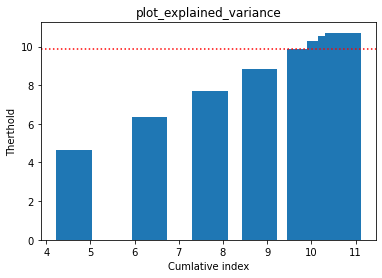

In [152]:
pca_section.plot_explained_variance()